# Cryptocurrency Data Analysis
This notebook aims to analyze cryptocurrency data, focusing on Bitcoin, Ethereum, Solana, and Tether. We will load, preprocess, and explore these datasets, perform stationarity tests, and apply machine learning models to forecast future trends.


In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

## Data Loading and Preprocessing
In this section, we load the cryptocurrency data from CSV files and perform preprocessing. This includes converting date formats and calculating daily percentage changes in closing prices.


In [2]:
# Function to preprocess the data
def preprocess_data(df):
    # Parse the 'timestamp' column as datetime
    df['date'] = pd.to_datetime(df['timestamp'])
    # Calculate daily percentage change for 'close'
    df['close_pct_change'] = df['close'].pct_change()
    # Drop the rows where 'close_pct_change' is NaN
    df.dropna(subset=['close_pct_change'], inplace=True)
    return df

In [3]:
# Function to load the data with the correct delimiter and preprocess
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath, delimiter=';')
    df = preprocess_data(df)
    return df

## Data Loading and Preprocessing
In this section, we load the cryptocurrency data from CSV files and perform preprocessing. This includes converting date formats and calculating daily percentage changes in closing prices.


In [4]:
# Function to perform ADF test and print results
def perform_adf_test(series, title):
    print(f"Performing ADF Test on {title}")
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print()

In [5]:
# Function to plot closing prices and percentage changes
def plot_data(df, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(df['date'], df['close'], label='Close Price')
    plt.title(f'Closing Prices for {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['date'], df['close_pct_change'], label='Daily % Change', color='orange')
    plt.title(f'Daily Percentage Change for {title}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
btc_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Bitcoin_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
eth_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Ethereum_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
sol_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Solana_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
usdt_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tether%20USDt_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
bch_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Bitcoin%20Cash_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
dash_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Dash_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
dcr_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Decred_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
doge_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Dogecoin_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
ltc_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Litecoin_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
xmr_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Monero_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
rvn_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Ravencoin_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')
zec_df = load_and_preprocess('https://raw.githubusercontent.com/Zakhar-Niklaevich/XAI_Econ/main/Tables/Zcash_12_1_2022-12_1_2023_historical_data_coinmarketcap.csv')

## Stationarity Tests
We use the Augmented Dickey-Fuller (ADF) test to check the stationarity of our time series data. Stationarity is crucial for the effectiveness of many time series models.


Performing ADF Test on Bitcoin
ADF Statistic: -18.844992
p-value: 0.000000



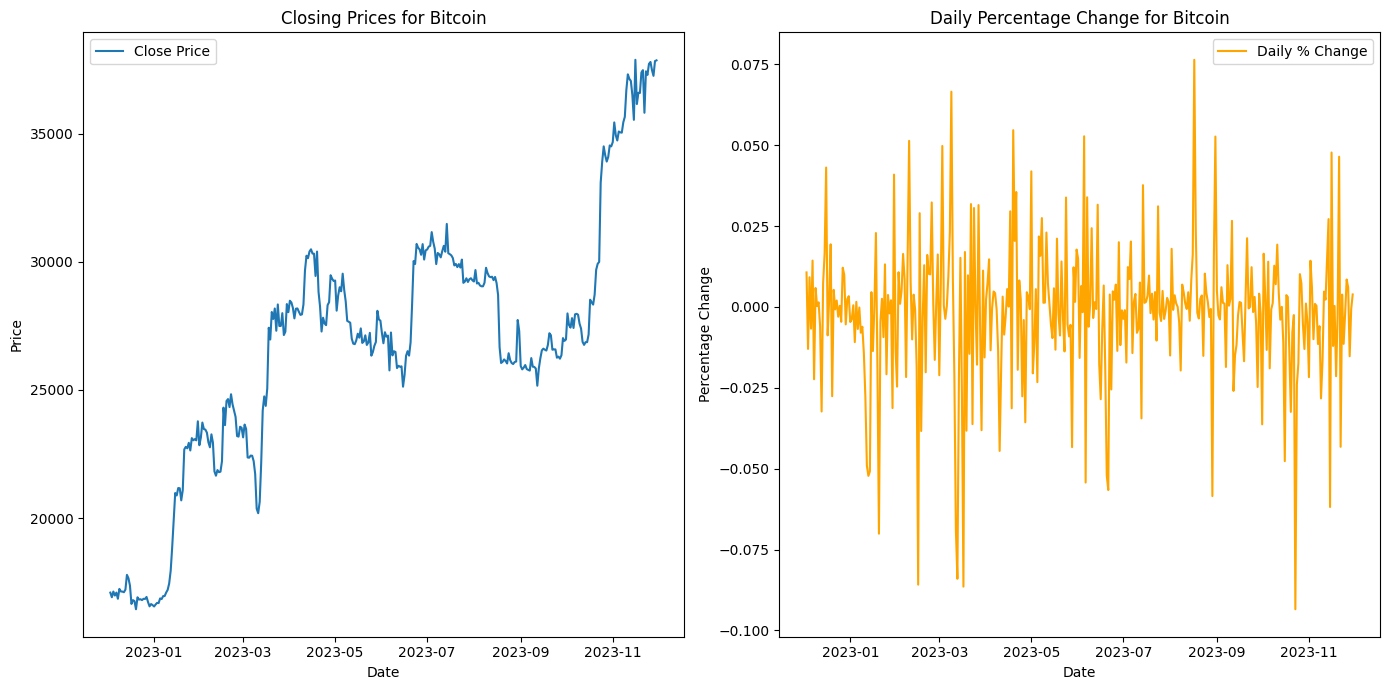

Performing ADF Test on Ethereum
ADF Statistic: -21.344553
p-value: 0.000000



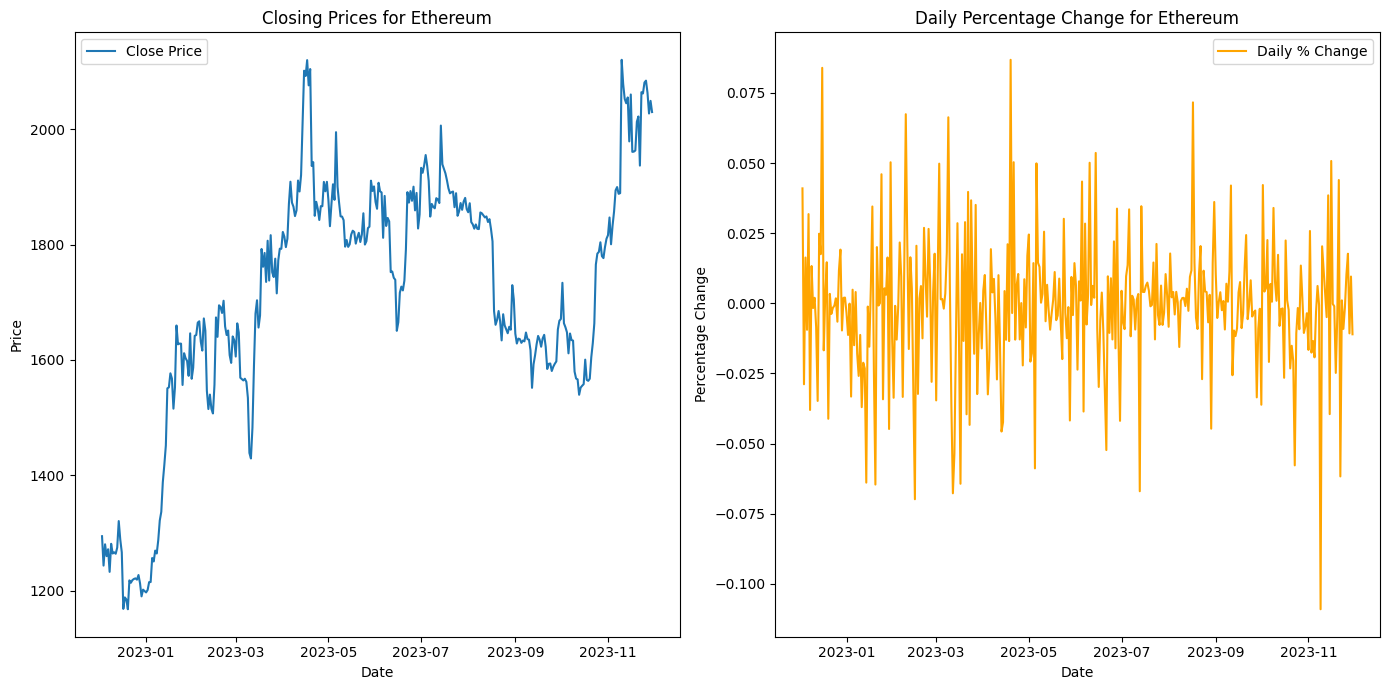

Performing ADF Test on Solana
ADF Statistic: -18.875803
p-value: 0.000000



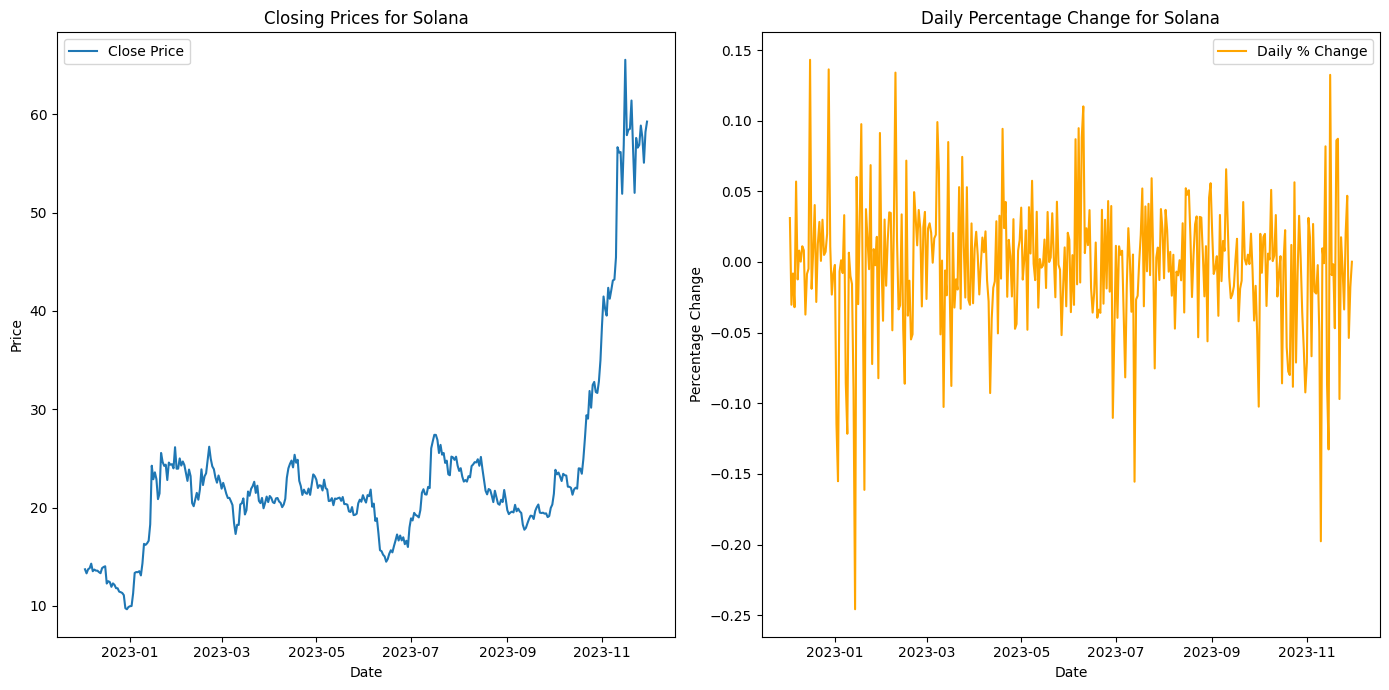

Performing ADF Test on Tether
ADF Statistic: -11.325147
p-value: 0.000000



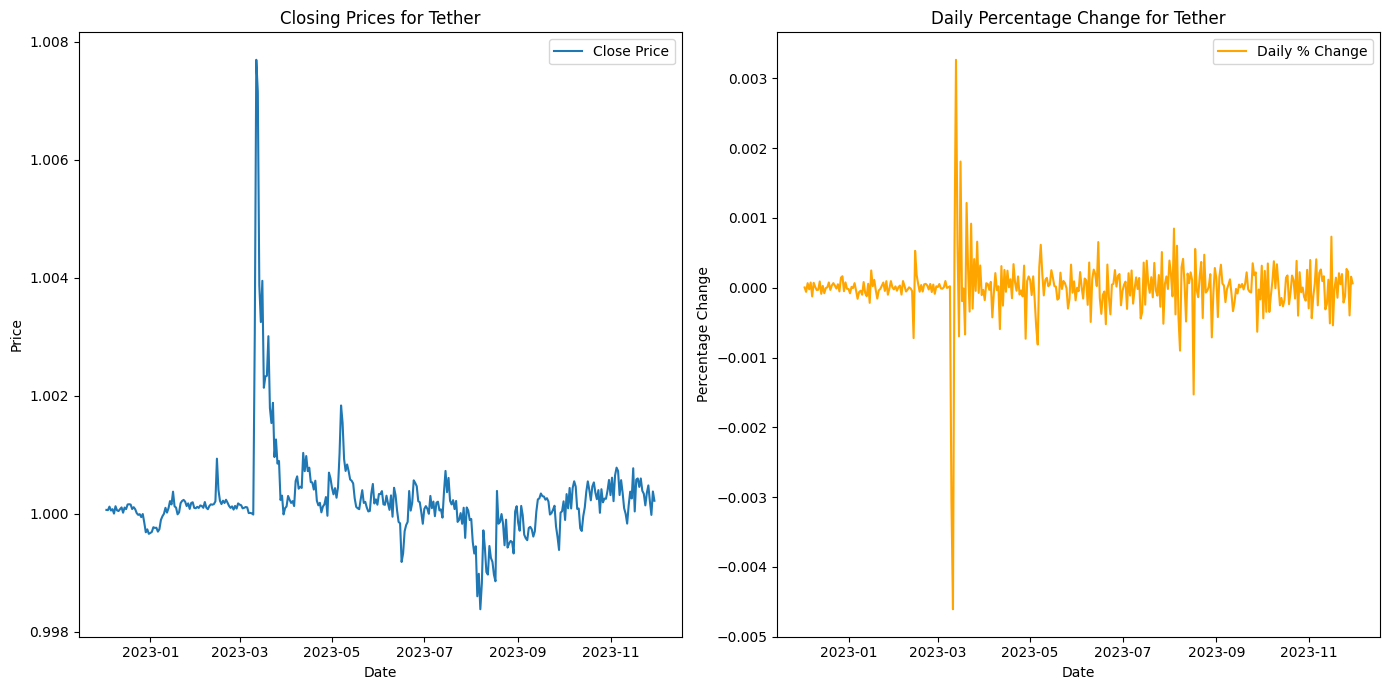

In [7]:
# Perform ADF Test and visualize data
for df, label in zip([btc_df, eth_df, sol_df, usdt_df], ["Bitcoin", "Ethereum", "Solana", "Tether"]):
    perform_adf_test(df['close_pct_change'], label)
    plot_data(df, label)

# Feature Engineering: Create Lagged Features for Time Series Models

This code defines a function `create_lagged_features` for feature engineering in time series data analysis. The purpose of this function is to create lagged features, which are past values of a specific variable, to be used as input features for predictive models.


In [8]:
# Feature Engineering: Create lagged features for the models
def create_lagged_features(df, n_lags=1):
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    df.dropna(inplace=True)
    return df

## Machine Learning Analysis
In this part, we apply machine learning models such as Random Forest and Gradient Boosting. These models help us predict future cryptocurrency prices based on historical data.


In [9]:
def machine_learning_analysis(df, currency_name, n_lags=3):
    # Create lagged features
    df = create_lagged_features(df, n_lags=n_lags)

    # Split the data into features and target
    X = df[[f'lag_{i}' for i in range(1, n_lags + 1)]]
    y = df['close']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Cross-validation
    rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    print(f"{currency_name} - Random Forest CV MSE: {-rf_cv_scores.mean()}")
    print(f"{currency_name} - Gradient Boosting CV MSE: {-gb_cv_scores.mean()}")

    # Training and evaluating Random Forest model
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_predictions)
    print(f"{currency_name} - Random Forest Test MSE: {rf_mse}")

    # Training and evaluating Gradient Boosting model
    gb_model.fit(X_train, y_train)
    gb_predictions = gb_model.predict(X_test)
    gb_mse = mean_squared_error(y_test, gb_predictions)
    print(f"{currency_name} - Gradient Boosting Test MSE: {gb_mse}")

    # Visualize the results
    plt.figure(figsize=(14, 7))
    plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest Predictions')
    plt.plot(y_test, y_test, color='red', label='Actual Close Prices')
    plt.title(f'{currency_name} - Random Forest Predictions vs Actual')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.legend()
    plt.show()

    # Visualize the Gradient Boosting results
    plt.figure(figsize=(14, 7))
    plt.scatter(y_test, gb_predictions, alpha=0.5, color='green', label='Gradient Boosting Predictions')
    plt.plot(y_test, y_test, color='red', label='Actual Close Prices')
    plt.title(f'{currency_name} - Gradient Boosting Predictions vs Actual')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.legend()
    plt.show()



## Model Evaluation and Cross-Validation
We evaluate our machine learning models using cross-validation. This helps in understanding the models' performance and their generalization capability.
## Results Visualization
We visualize the predictions from our machine learning models against the actual data. This comparison helps in assessing the accuracy and performance of our predictions.


Bitcoin - Random Forest CV MSE: 525138.3044931233
Bitcoin - Gradient Boosting CV MSE: 475320.9667265622
Bitcoin - Random Forest Test MSE: 382066.3581635944
Bitcoin - Gradient Boosting Test MSE: 429634.6107867434


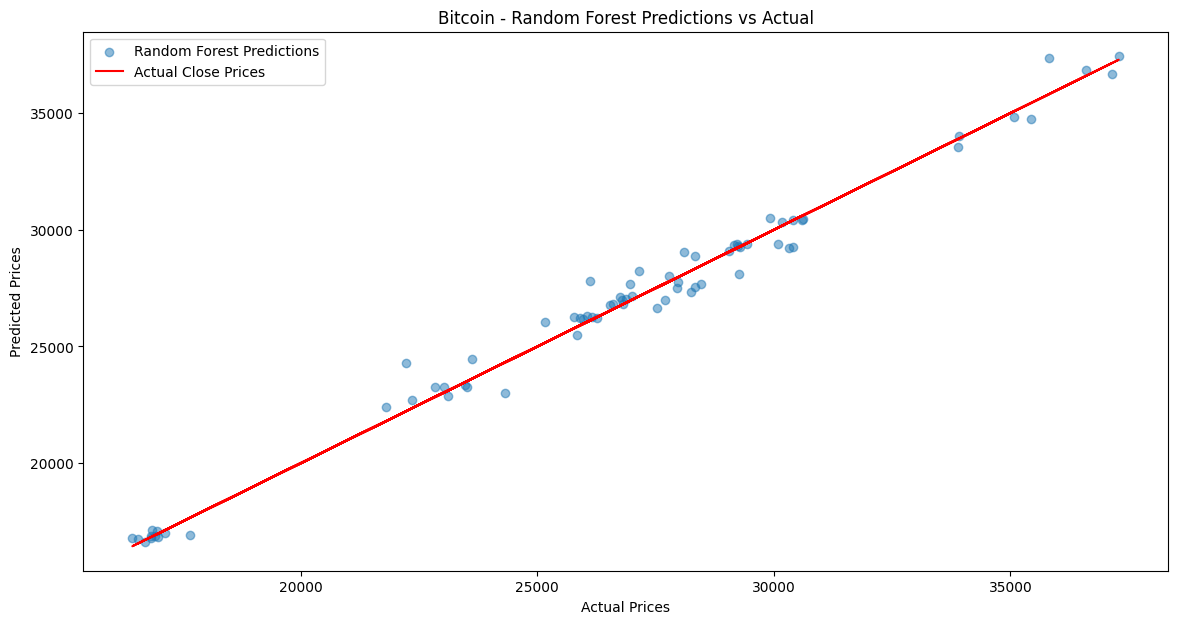

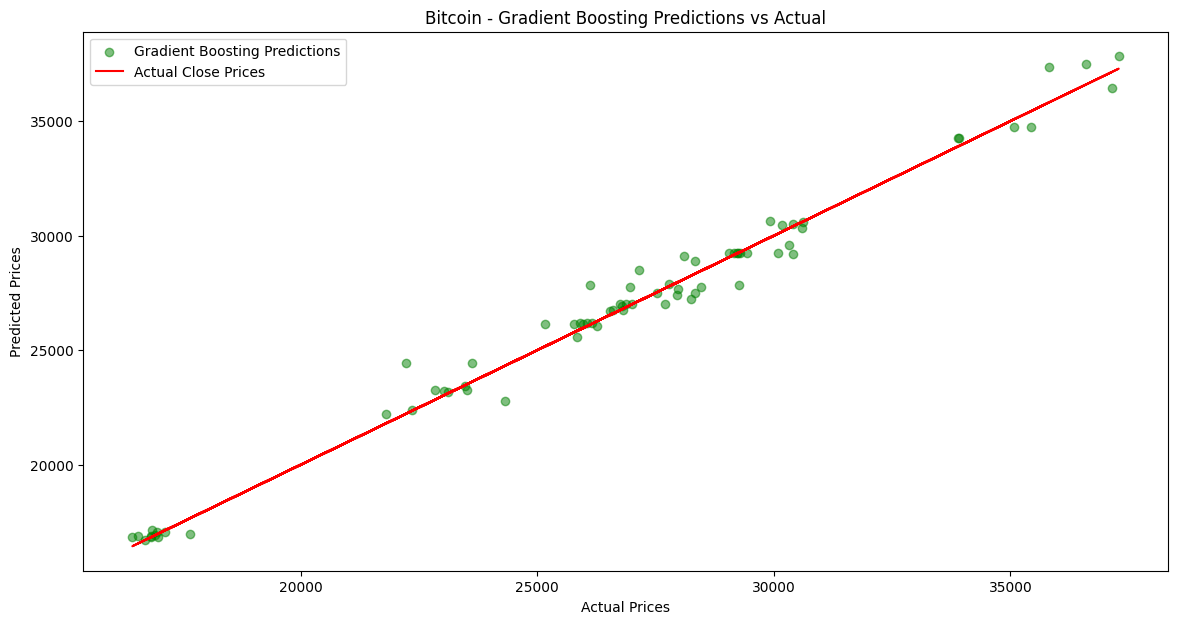

Ethereum - Random Forest CV MSE: 1962.624564677199
Ethereum - Gradient Boosting CV MSE: 1929.5546243489584
Ethereum - Random Forest Test MSE: 2209.8311780532467
Ethereum - Gradient Boosting Test MSE: 2322.4351355487333


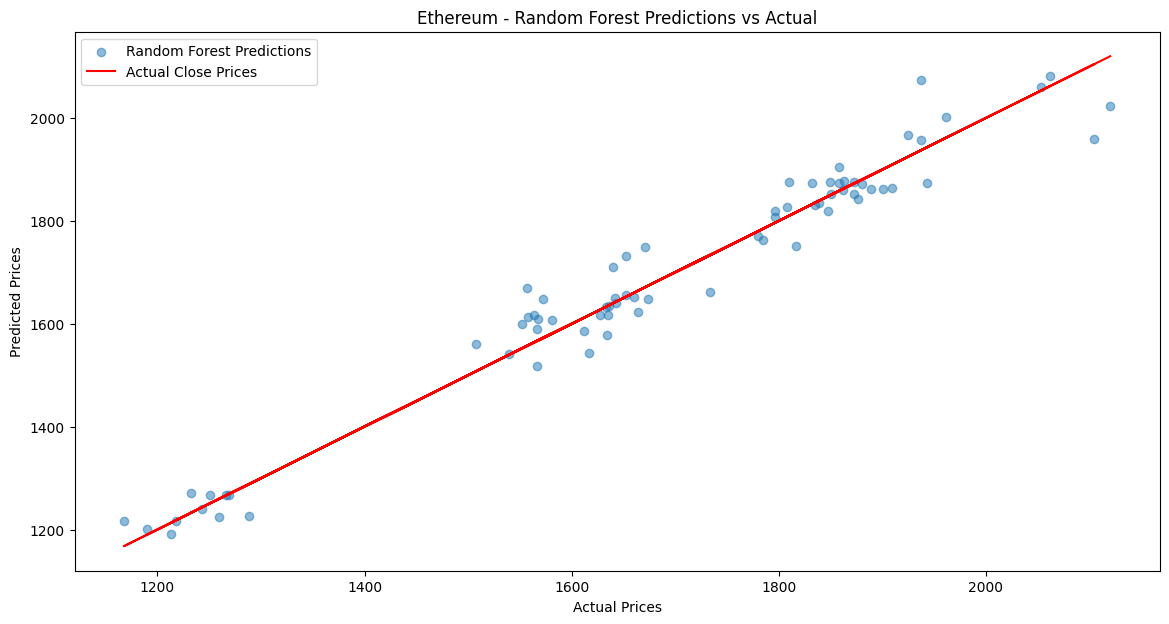

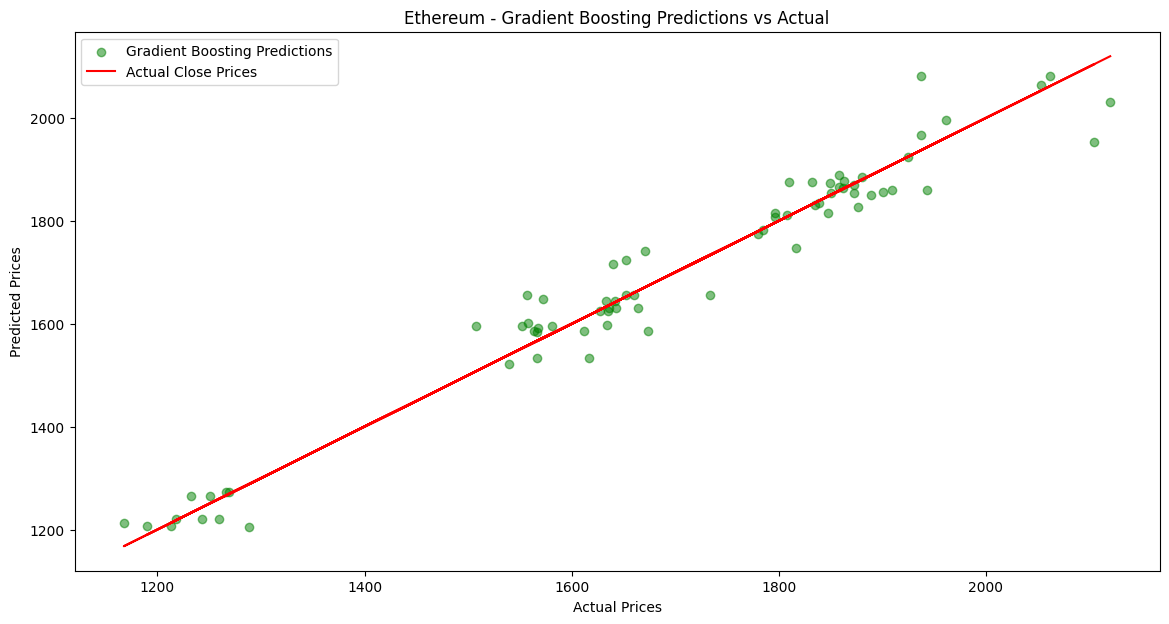

Solana - Random Forest CV MSE: 3.072078495738328
Solana - Gradient Boosting CV MSE: 2.7834397082175464
Solana - Random Forest Test MSE: 1.2630141506838497
Solana - Gradient Boosting Test MSE: 2.023150150761868


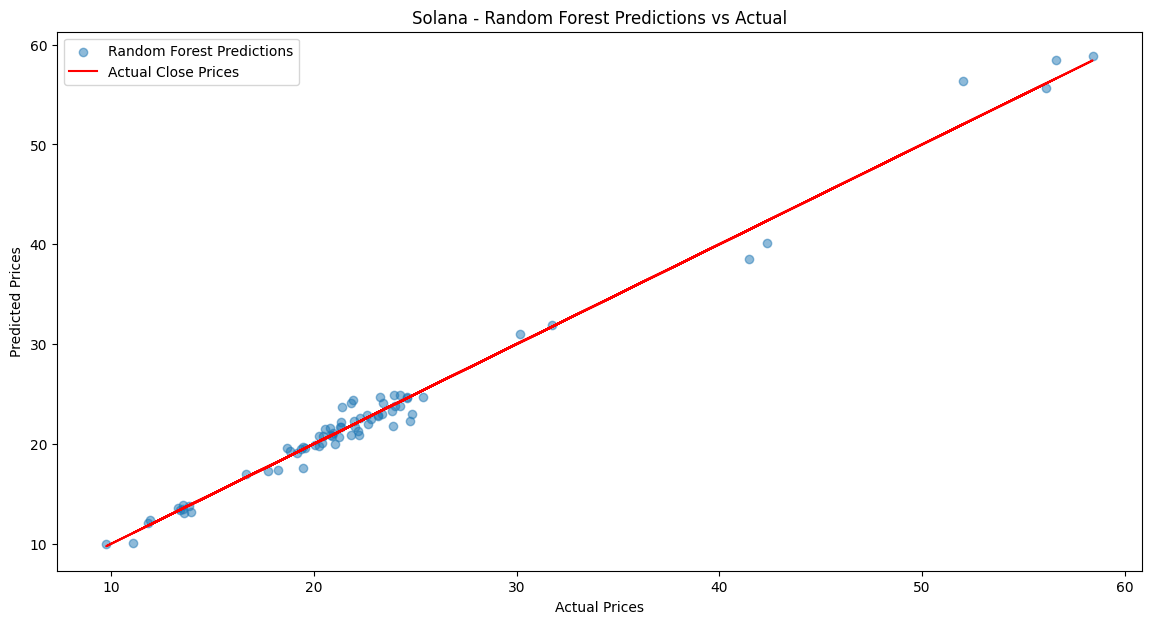

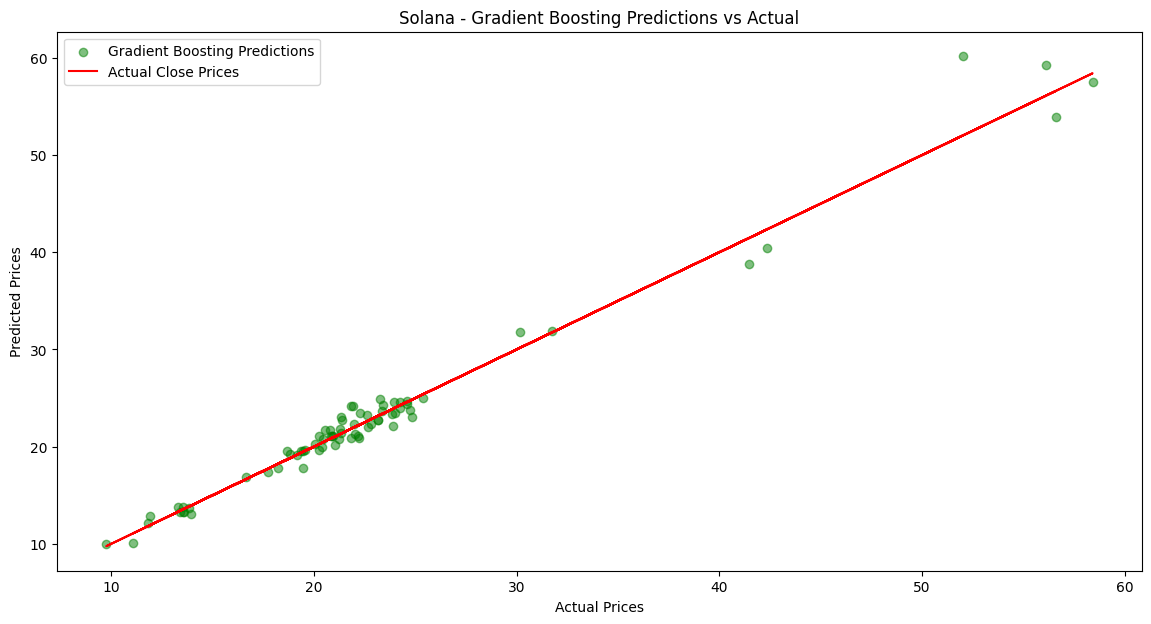

Tether - Random Forest CV MSE: 3.7915246758255946e-07
Tether - Gradient Boosting CV MSE: 3.9508032264071316e-07
Tether - Random Forest Test MSE: 5.550689822406557e-08
Tether - Gradient Boosting Test MSE: 6.358258834129849e-08


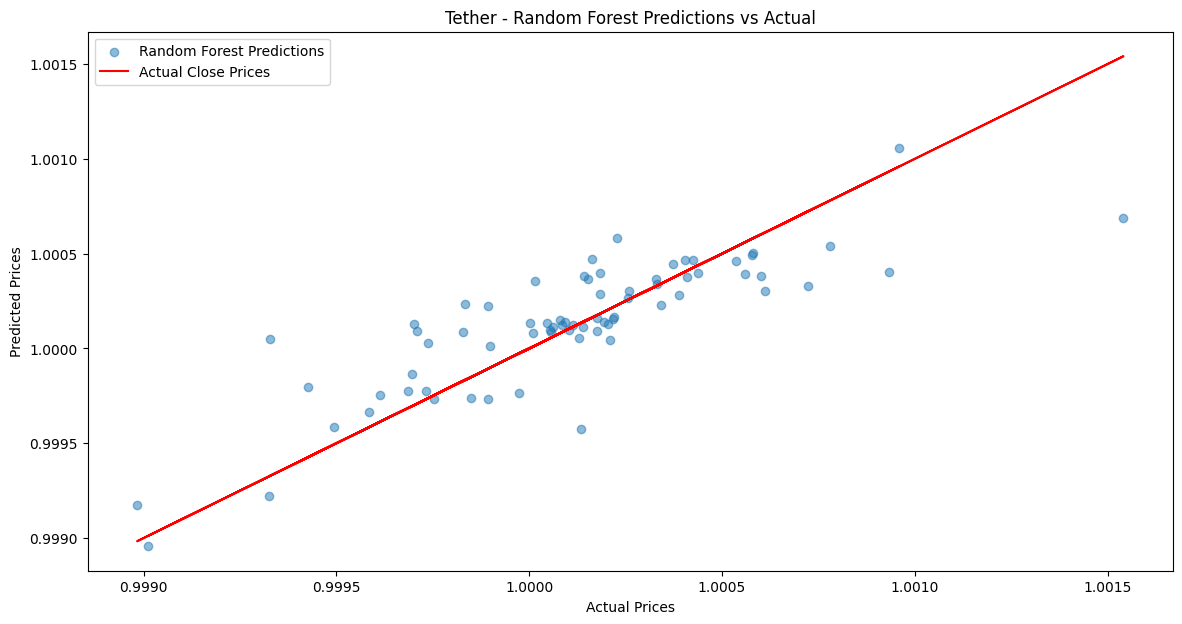

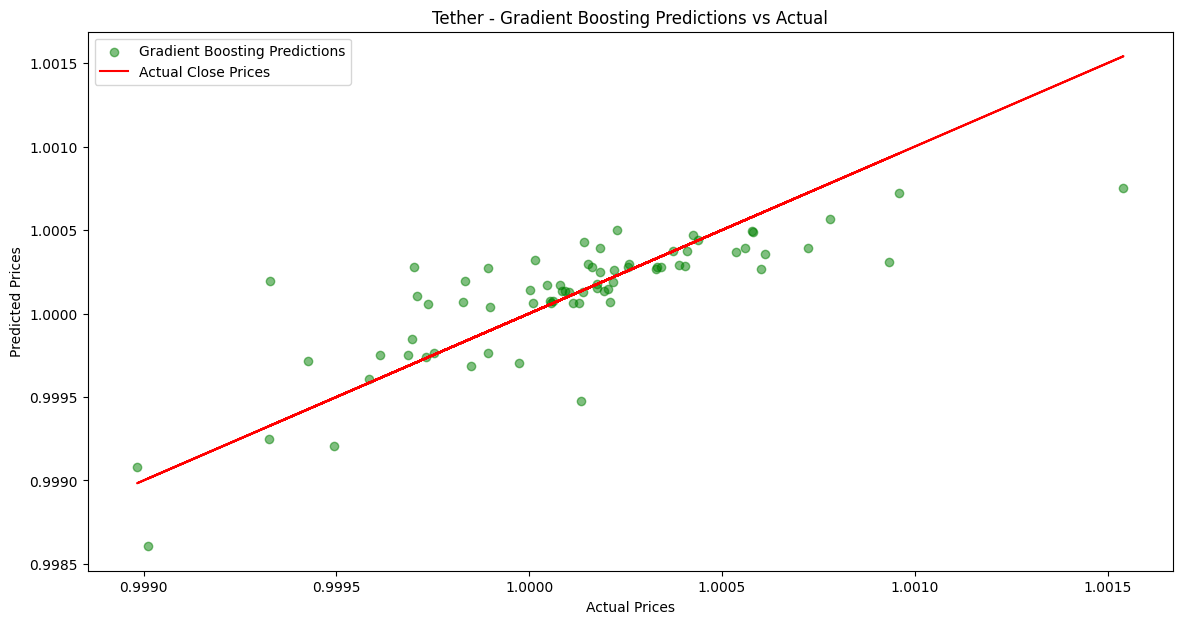

In [10]:
# Perform machine learning analysis for each cryptocurrency
machine_learning_analysis(btc_df, "Bitcoin")
machine_learning_analysis(eth_df, "Ethereum")
machine_learning_analysis(sol_df, "Solana")
machine_learning_analysis(usdt_df, "Tether")

## Conclusion
This notebook provided a comprehensive analysis of cryptocurrency data. The key findings include [summarize key findings]. These insights can be valuable for understanding market trends and making informed decisions in the cryptocurrency domain.


In [11]:
# 1. Correlation Analysis
corr_matrix = pd.DataFrame({
    'BTC': btc_df['close_pct_change'],
    'ETH': eth_df['close_pct_change'],
    'SOL': sol_df['close_pct_change'],
    'USDT': usdt_df['close_pct_change']
}).corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
            BTC       ETH       SOL      USDT
BTC   1.000000  0.853551  0.668190 -0.039445
ETH   0.853551  1.000000  0.667322 -0.009433
SOL   0.668190  0.667322  1.000000  0.067796
USDT -0.039445 -0.009433  0.067796  1.000000


In [12]:
coin_data = pd.concat([btc_df['close'], eth_df['close'], sol_df['close'], usdt_df['close']], axis=1)
coin_data.columns = ['BTC', 'ETH', 'SOL', 'USDT']
coint_test = coint_johansen(coin_data.dropna(), det_order=0, k_ar_diff=1)
print("Cointegration Test Result: \n", coint_test.lr1)  # Test statistics

Cointegration Test Result: 
 [91.64919203 33.86295941 15.15362586  1.24425194]


In [13]:
# 3. Granger Causality Test
for coin in ['ETH', 'SOL', 'USDT']:
    print(f"Granger Causality Test Results for BTC and {coin}:")
    granger_result = grangercausalitytests(coin_data[['BTC', coin]].dropna(), maxlag=5)
    print()

Granger Causality Test Results for BTC and ETH:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2216  , p=0.6381  , df_denom=356, df_num=1
ssr based chi2 test:   chi2=0.2235  , p=0.6364  , df=1
likelihood ratio test: chi2=0.2234  , p=0.6365  , df=1
parameter F test:         F=0.2216  , p=0.6381  , df_denom=356, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9148  , p=0.0208  , df_denom=353, df_num=2
ssr based chi2 test:   chi2=7.9404  , p=0.0189  , df=2
likelihood ratio test: chi2=7.8536  , p=0.0197  , df=2
parameter F test:         F=3.9148  , p=0.0208  , df_denom=353, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4385  , p=0.0643  , df_denom=350, df_num=3
ssr based chi2 test:   chi2=7.4619  , p=0.0585  , df=3
likelihood ratio test: chi2=7.3850  , p=0.0606  , df=3
parameter F test:         F=2.4385  , p=0.0643  , df_denom=350, df_num=3

Granger Causality
number of lags (no zero) 4


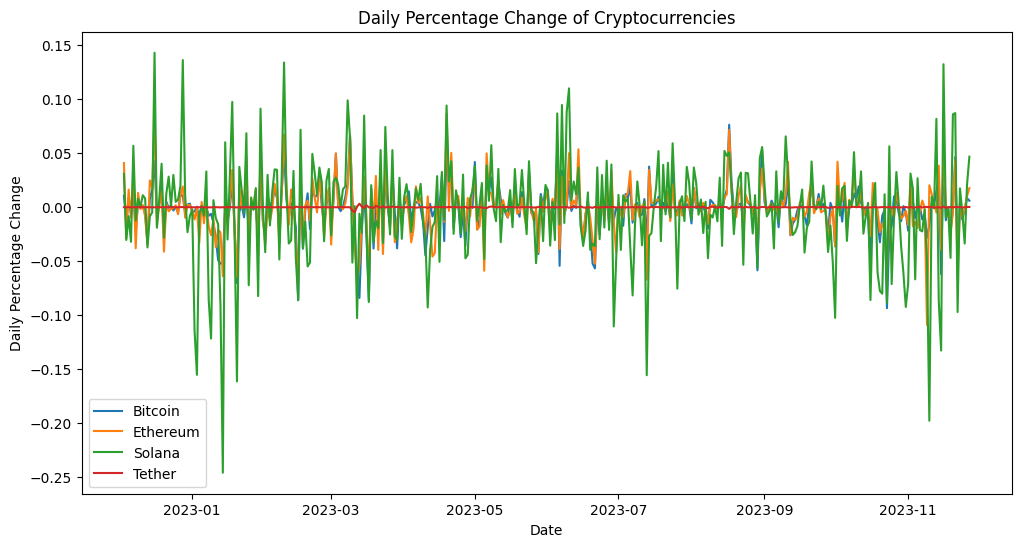

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(btc_df['date'], btc_df['close_pct_change'], label='Bitcoin')
plt.plot(eth_df['date'], eth_df['close_pct_change'], label='Ethereum')
plt.plot(sol_df['date'], sol_df['close_pct_change'], label='Solana')
plt.plot(usdt_df['date'], usdt_df['close_pct_change'], label='Tether')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.title('Daily Percentage Change of Cryptocurrencies')
plt.legend()
plt.show()


## Granger Causality Test Analysis

The Granger Causality Test results indicate significant relationships between the price movements of different cryptocurrencies:

- **Bitcoin and Ethereum**: There is evidence of Ethereum's past values influencing Bitcoin prices, particularly at a lag of 2 days. This suggests some level of predictive power from Ethereum to Bitcoin.

- **Bitcoin and Solana**: Similar to Ethereum, Solana's past values show a predictive influence on Bitcoin's future prices at a lag of 2 days.

- **Bitcoin and Tether**: A strong and consistent causal relationship from Tether to Bitcoin is observed at all tested lags, with the highest significance at a lag of 1 day. This implies that Tether's movements are a consistent predictor of Bitcoin's price movements.

These findings highlight the interconnected nature of the cryptocurrency market, where movements in one coin can have predictive implications for others, especially for Bitcoin.


In [15]:
# 1. Correlation Analysis
corr_matrix = pd.DataFrame({
    'BTC': btc_df['close_pct_change'],
    'ETH': eth_df['close_pct_change'],
    'SOL': sol_df['close_pct_change'],
    'USDT': usdt_df['close_pct_change'],
    'BCH': bch_df['close_pct_change'],
    'DASH': dash_df['close_pct_change'],
    'DCR': dcr_df['close_pct_change'],
    'DOGE': doge_df['close_pct_change'],
    'LTC': ltc_df['close_pct_change'],
    'XMR': xmr_df['close_pct_change'],
    'RVN': rvn_df['close_pct_change'],
    'ZEC': zec_df['close_pct_change']
}).corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
            BTC       ETH       SOL      USDT       BCH      DASH       DCR  \
BTC   1.000000  0.853551  0.668190 -0.039445  0.601445  0.636069  0.538687   
ETH   0.853551  1.000000  0.667322 -0.009433  0.552908  0.655972  0.502878   
SOL   0.668190  0.667322  1.000000  0.067796  0.452686  0.559291  0.481069   
USDT -0.039445 -0.009433  0.067796  1.000000  0.009171 -0.175580 -0.083327   
BCH   0.601445  0.552908  0.452686  0.009171  1.000000  0.513140  0.390632   
DASH  0.636069  0.655972  0.559291 -0.175580  0.513140  1.000000  0.532215   
DCR   0.538687  0.502878  0.481069 -0.083327  0.390632  0.532215  1.000000   
DOGE  0.608461  0.643561  0.531943 -0.036171  0.496936  0.639514  0.503138   
LTC   0.674708  0.713419  0.566015 -0.131838  0.613527  0.789804  0.506960   
XMR   0.571672  0.561811  0.446961 -0.045073  0.401407  0.520252  0.427981   
RVN   0.720944  0.717117  0.636138 -0.042650  0.525321  0.697029  0.625185   
ZEC   0.674857  0.710925  0.620212 -0.09556

In [16]:
# 2. Cointegration Test
coin_data = pd.concat([
    btc_df['close'], eth_df['close'], sol_df['close'], usdt_df['close'],
    bch_df['close'], dash_df['close'], dcr_df['close'], doge_df['close'],
    ltc_df['close'], xmr_df['close'], rvn_df['close'], zec_df['close']
], axis=1)

In [17]:
coin_data.columns = ['BTC', 'ETH', 'SOL', 'USDT', 'BCH', 'DASH', 'DCR', 'DOGE', 'LTC', 'XMR', 'RVN', 'ZEC']

In [18]:
# 3. Granger Causality Test - Adjusted
all_coins = ['BTC', 'ETH', 'SOL', 'USDT', 'BCH', 'DASH', 'DCR', 'DOGE', 'LTC', 'XMR', 'RVN', 'ZEC']
granger_results = []

def check_stationarity(time_series):
    # Drop NaN and infinite values
    time_series = time_series.replace([np.inf, -np.inf], np.nan).dropna()

    # Check if the series is empty after dropping NaN and inf values
    if len(time_series) == 0:
        return False  # Can't determine stationarity

    result = adfuller(time_series, autolag='AIC')
    if result[1] < 0.05:
        return True  # Stationary
    else:
        return False  # Not stationary

# Assuming coin_data is a DataFrame where each column represents a coin's time series

# Make sure the data is stationary
for coin in all_coins:
    if not check_stationarity(coin_data[coin]):
        coin_data[coin] = coin_data[coin].diff().dropna()  # Apply differencing

# Granger Causality Test - Adjusted
granger_results = []

for base_coin in all_coins:
    for coin in all_coins:
        if base_coin != coin:
            if base_coin in coin_data.columns and coin in coin_data.columns:
                granger_test = grangercausalitytests(coin_data[[base_coin, coin]].dropna(), maxlag=5, verbose=False)
                for lag, result in granger_test.items():
                    p_value = result[0]['ssr_chi2test'][1]
                    granger_results.append((base_coin, coin, lag, p_value))

# Convert results to DataFrame and sort
granger_df = pd.DataFrame(granger_results, columns=['Base_Coin', 'Coin', 'Lag', 'P_Value'])
granger_df_sorted = granger_df.sort_values(by='P_Value')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

In [19]:
# Save to Excel file
granger_df_sorted

,Base_Coin,Coin,Lag,P_Value
10,BTC,USDT,1,0.000228
595,RVN,XMR,1,0.000406
186,USDT,DASH,2,0.000738
208,USDT,XMR,4,0.000812
95,ETH,XMR,1,0.000997
...,...,...,...,...
136,SOL,DCR,2,0.979896
253,BCH,DOGE,4,0.983348
163,SOL,ZEC,4,0.983412
224,BCH,BTC,5,0.983716
